In [983]:
# imports
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, model_selection, svm
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
%matplotlib inline

In [984]:
df = pd.read_csv('Sales.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [985]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [986]:
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [987]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [988]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [989]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [990]:
d={}
d['Grocery Store']='Small'
d['Supermarket Type1']='Small'
d['Supermarket Type2']='Medium'
d['Supermarket Type3']='Medium'

def fillvalue(x):
        return d[x]


fk1=df['Outlet_Size'].isnull()
# print(fk1)

df.loc[fk1,'Outlet_Size']=df.loc[fk1,'Outlet_Type'].apply(lambda x: fillvalue(x))

df.head(10) 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [991]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat'],'Low Fat')

print(df['Item_Fat_Content'].unique())


# print(df[84])
df.head(77)

['Low Fat' 'Regular']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
72,FDH35,18.250,Low Fat,0.000000,Starchy Foods,164.7526,OUT045,2002,Small,Tier 2,Supermarket Type1,4604.6728
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,Small,Tier 2,Supermarket Type1,2285.0256
74,NCZ18,7.825,Low Fat,0.186357,Household,254.3698,OUT049,1999,Medium,Tier 1,Supermarket Type1,5580.7356
75,FDC29,8.390,Regular,0.024206,Frozen Foods,114.0176,OUT046,1997,Small,Tier 1,Supermarket Type1,2290.3520


In [992]:
df['Outlet_Size'] = df['Outlet_Size'].replace(['High'],'Large')

df['Outlet_Size'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [993]:
change_lists = df.columns[df.dtypes == "object"].tolist()

change_lists.remove('Item_Identifier')
# print(change_lists)

for i in change_lists:
    df[i] = df[i].astype("category")

df.head()  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [994]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 451.2+ KB


In [995]:
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Large,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [996]:
df['Item_Weight'].info()
df['Item_Weight'] = df['Item_Weight'].map(lambda x: round(x,2))
df['Item_Visibility'] = df['Item_Visibility'].map(lambda x: round(x,3))

df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Weight
Non-Null Count  Dtype  
--------------  -----  
8523 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.017,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [997]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858153,0.066133,140.992782,1997.831867,2181.288914
std,4.225989,0.051588,62.275067,8.371760,1706.499616
min,4.550000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.027000,93.826500,1987.000000,834.247400
50%,12.860000,0.054000,143.012800,1999.000000,1794.331000
75%,16.000000,0.095000,185.643700,2004.000000,3101.296400
max,21.350000,0.328000,266.888400,2009.000000,13086.964800


In [998]:
df.drop_duplicates(inplace=True)
df1=df.duplicated()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 517.7+ KB


In [999]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 517.7+ KB


In [1000]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858153,0.066133,140.992782,1997.831867,2181.288914
std,4.225989,0.051588,62.275067,8.371760,1706.499616
min,4.550000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.027000,93.826500,1987.000000,834.247400
50%,12.860000,0.054000,143.012800,1999.000000,1794.331000
75%,16.000000,0.095000,185.643700,2004.000000,3101.296400
max,21.350000,0.328000,266.888400,2009.000000,13086.964800


In [1001]:
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [1002]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(4), int64(1), object(1)
memory usage: 517.7+ KB


In [1003]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016,249.8092,1999,3735.1380
1,5.92,0.019,48.2692,2009,443.4228
2,17.50,0.017,141.6180,1999,2097.2700
3,19.20,0.000,182.0950,1998,732.3800
4,8.93,0.000,53.8614,1987,994.7052


In [1004]:
columns = df.select_dtypes(['category']).columns
df[columns] = df[columns].apply(lambda x: x.cat.codes)


df 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.017,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.87,0,0.057,13,214.5218,1,1987,0,2,1,2778.3834
8519,FDS36,8.38,1,0.047,0,108.1570,7,2002,2,1,1,549.2850
8520,NCJ29,10.60,0,0.035,8,85.1224,6,2004,2,1,1,1193.1136
8521,FDN46,7.21,1,0.145,13,103.1332,3,2009,1,2,2,1845.5976


In [1005]:
enc=OneHotEncoder()
onehot1=pd.DataFrame(enc.fit_transform(df[['Outlet_Size']]).toarray())
  
df['Outlet_Large']=onehot1[0]
df['Outlet_Medium']=onehot1[1]
df['Outlet_Small']=onehot1[2]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,FDA15,9.30,0,0.016,4,249.8092,9,1999,1,0,1,3735.1380,0.0,1.0,0.0
1,DRC01,5.92,1,0.019,14,48.2692,3,2009,1,2,2,443.4228,0.0,1.0,0.0
2,FDN15,17.50,0,0.017,10,141.6180,9,1999,1,0,1,2097.2700,0.0,1.0,0.0
3,FDX07,19.20,1,0.000,6,182.0950,0,1998,2,2,0,732.3800,0.0,0.0,1.0
4,NCD19,8.93,0,0.000,9,53.8614,1,1987,0,2,1,994.7052,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.87,0,0.057,13,214.5218,1,1987,0,2,1,2778.3834,1.0,0.0,0.0
8519,FDS36,8.38,1,0.047,0,108.1570,7,2002,2,1,1,549.2850,0.0,0.0,1.0
8520,NCJ29,10.60,0,0.035,8,85.1224,6,2004,2,1,1,1193.1136,0.0,0.0,1.0
8521,FDN46,7.21,1,0.145,13,103.1332,3,2009,1,2,2,1845.5976,0.0,1.0,0.0


In [1006]:
df.drop(['Outlet_Size'],axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,FDA15,9.30,0,0.016,4,249.8092,9,1999,0,1,3735.1380,0.0,1.0,0.0
1,DRC01,5.92,1,0.019,14,48.2692,3,2009,2,2,443.4228,0.0,1.0,0.0
2,FDN15,17.50,0,0.017,10,141.6180,9,1999,0,1,2097.2700,0.0,1.0,0.0
3,FDX07,19.20,1,0.000,6,182.0950,0,1998,2,0,732.3800,0.0,0.0,1.0
4,NCD19,8.93,0,0.000,9,53.8614,1,1987,2,1,994.7052,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.87,0,0.057,13,214.5218,1,1987,2,1,2778.3834,1.0,0.0,0.0
8519,FDS36,8.38,1,0.047,0,108.1570,7,2002,1,1,549.2850,0.0,0.0,1.0
8520,NCJ29,10.60,0,0.035,8,85.1224,6,2004,1,1,1193.1136,0.0,0.0,1.0
8521,FDN46,7.21,1,0.145,13,103.1332,3,2009,2,2,1845.5976,0.0,1.0,0.0


In [1007]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,FDA15,9.30,0,0.016,4,249.8092,9,1999,1,0,1,3735.1380,0.0,1.0,0.0
1,DRC01,5.92,1,0.019,14,48.2692,3,2009,1,2,2,443.4228,0.0,1.0,0.0
2,FDN15,17.50,0,0.017,10,141.6180,9,1999,1,0,1,2097.2700,0.0,1.0,0.0
3,FDX07,19.20,1,0.000,6,182.0950,0,1998,2,2,0,732.3800,0.0,0.0,1.0
4,NCD19,8.93,0,0.000,9,53.8614,1,1987,0,2,1,994.7052,1.0,0.0,0.0


In [1008]:
def removeOutliers(dataframe):
    
    a1 = np.quantile(dataframe, 0.25)
    a2 = np.quantile(dataframe, 0.75)
    
    IQR = a2-a1
 
    low = a1 - 1.5 * IQR
    high = a2 + 1.5 * IQR
    
    return low,high
    
 

l1,h1=removeOutliers(df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']= np.where(df['Item_Outlet_Sales']>h1,h1,df['Item_Outlet_Sales'])
df['Item_Outlet_Sales']= np.where(df['Item_Outlet_Sales']<l1,l1,df['Item_Outlet_Sales'])

# l2,h2=removeOutliers(df['Item_Visibility'])
# df['Item_Visibility']= np.where(df['Item_Visibility']>h2,h2,df['Item_Visibility'])
# df['Item_Visibility']= np.where(df['Item_Visibility']<l2,l2,df['Item_Visibility'])


In [1009]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,FDA15,9.30,0,0.016,4,249.8092,9,1999,1,0,1,3735.1380,0.0,1.0,0.0
1,DRC01,5.92,1,0.019,14,48.2692,3,2009,1,2,2,443.4228,0.0,1.0,0.0
2,FDN15,17.50,0,0.017,10,141.6180,9,1999,1,0,1,2097.2700,0.0,1.0,0.0
3,FDX07,19.20,1,0.000,6,182.0950,0,1998,2,2,0,732.3800,0.0,0.0,1.0
4,NCD19,8.93,0,0.000,9,53.8614,1,1987,0,2,1,994.7052,1.0,0.0,0.0


In [1010]:
normalize_numbers=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
df[normalize_numbers]=(df[normalize_numbers]-df[normalize_numbers].min())/(df[normalize_numbers].max()-df[normalize_numbers].min())
 
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,FDA15,0.282738,0,0.048780,4,0.927507,9,0.583333,1,0,1,0.572281,0.0,1.0,0.0
1,DRC01,0.081548,1,0.057927,14,0.072068,3,1.000000,1,2,2,0.063404,0.0,1.0,0.0
2,FDN15,0.770833,0,0.051829,10,0.468288,9,0.583333,1,0,1,0.319078,0.0,1.0,0.0
3,FDX07,0.872024,1,0.000000,6,0.640093,0,0.541667,2,2,0,0.108075,0.0,0.0,1.0
4,NCD19,0.260714,0,0.000000,9,0.095805,1,0.083333,0,2,1,0.148628,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0.138095,0,0.173780,13,0.777729,1,0.083333,0,2,1,0.424373,1.0,0.0,0.0
8519,FDS36,0.227976,1,0.143293,0,0.326263,7,0.708333,2,1,1,0.079769,0.0,0.0,1.0
8520,NCJ29,0.360119,0,0.106707,8,0.228492,6,0.791667,2,1,1,0.179301,0.0,0.0,1.0
8521,FDN46,0.158333,1,0.442073,13,0.304939,3,1.000000,1,2,2,0.280171,0.0,1.0,0.0


In [1011]:
df = df.drop('Item_Identifier',1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20512\3654019109.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Item_Identifier',1)


In [1012]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int8   
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int8   
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   int8   
 6   Outlet_Establishment_Year  8523 non-null   float64
 7   Outlet_Size                8523 non-null   int8   
 8   Outlet_Location_Type       8523 non-null   int8   
 9   Outlet_Type                8523 non-null   int8   
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Outlet_Large               8523 non-null   float64
 12  Outlet_Medium              8523 non-null   float64
 13  Outlet_Small               8523 non-null   float

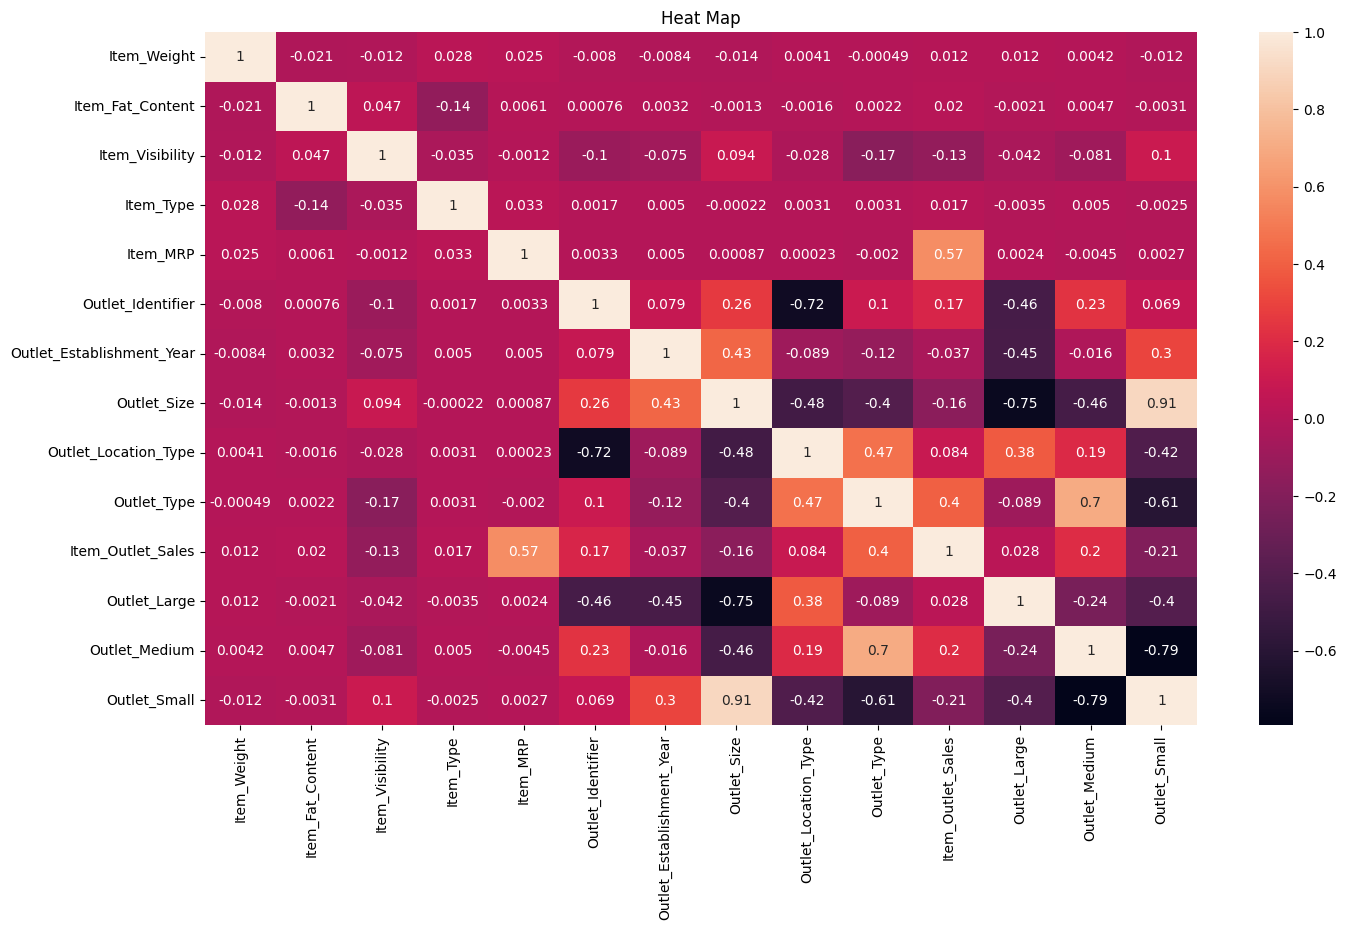

In [1013]:
heat_map=df.corr()
plt.figure(figsize= (16,9))
sns.heatmap(heat_map, annot = True,)
plt.title('Heat Map')
plt.show()
# plt.savefig('HeatMap.png')

In [1014]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                           Item_Weight  Item_Fat_Content  Item_Visibility  \
Item_Weight                   1.000000          0.021161         0.012016   
Item_Fat_Content              0.021161          1.000000         0.047368   
Item_Visibility               0.012016          0.047368         1.000000   
Item_Type                     0.028017          0.139434         0.035273   
Item_MRP                      0.024771          0.006063         0.001182   
Outlet_Identifier             0.007979          0.000764         0.100442   
Outlet_Establishment_Year     0.008438          0.003151         0.074877   
Outlet_Size                   0.014114          0.001262         0.094002   
Outlet_Location_Type          0.004107          0.001598         0.028071   
Outlet_Type                   0.000486          0.002199         0.173451   
Item_Outlet_Sales             0.012390          0.019675         0.131512   
Outlet_Large                  0.012278          0.002132         0.041894   

In [1015]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                           Item_Weight  Item_Fat_Content  Item_Visibility  \
Item_Weight                        NaN          0.021161         0.012016   
Item_Fat_Content                   NaN               NaN         0.047368   
Item_Visibility                    NaN               NaN              NaN   
Item_Type                          NaN               NaN              NaN   
Item_MRP                           NaN               NaN              NaN   
Outlet_Identifier                  NaN               NaN              NaN   
Outlet_Establishment_Year          NaN               NaN              NaN   
Outlet_Size                        NaN               NaN              NaN   
Outlet_Location_Type               NaN               NaN              NaN   
Outlet_Type                        NaN               NaN              NaN   
Item_Outlet_Sales                  NaN               NaN              NaN   
Outlet_Large                       NaN               NaN              NaN   

C:\Users\DELL\AppData\Local\Temp\ipykernel_20512\3477284062.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [1016]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] < 0 )]
print(); print(to_drop)


[]


In [1017]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,0.282738,0,0.048780,4,0.927507,9,0.583333,1,0,1,0.572281,0.0,1.0,0.0
1,0.081548,1,0.057927,14,0.072068,3,1.000000,1,2,2,0.063404,0.0,1.0,0.0
2,0.770833,0,0.051829,10,0.468288,9,0.583333,1,0,1,0.319078,0.0,1.0,0.0
3,0.872024,1,0.000000,6,0.640093,0,0.541667,2,2,0,0.108075,0.0,0.0,1.0
4,0.260714,0,0.000000,9,0.095805,1,0.083333,0,2,1,0.148628,1.0,0.0,0.0


In [1018]:
df =df.drop(['Outlet_Establishment_Year', 'Item_Type'], axis = 1)

In [1019]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Large,Outlet_Medium,Outlet_Small
0,0.282738,0,0.048780,0.927507,9,1,0,1,0.572281,0.0,1.0,0.0
1,0.081548,1,0.057927,0.072068,3,1,2,2,0.063404,0.0,1.0,0.0
2,0.770833,0,0.051829,0.468288,9,1,0,1,0.319078,0.0,1.0,0.0
3,0.872024,1,0.000000,0.640093,0,2,2,0,0.108075,0.0,0.0,1.0
4,0.260714,0,0.000000,0.095805,1,0,2,1,0.148628,1.0,0.0,0.0


taking x and y values

In [1020]:
x=df.drop('Item_Outlet_Sales',1)
y=df['Item_Outlet_Sales'].values.reshape(-1,1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20512\150773798.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop('Item_Outlet_Sales',1)


spliting x train y train x test y test 

In [1039]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=55)

In [1044]:
#from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, 
#    test_size=0.3,random_state =1 )
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=kfold)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

r2 / variance :  0.5448602814202019
Residual sum of squares: 0.03


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeli

In [1045]:
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(data, ground_truth_data, 
   #test_size=0.3,random_state =1 )
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print ("r2/variance : ", model.score(X_test,y_test))
print("Residual sum of squares: %.2f"
              % np.mean((model.predict(X_test) - y_test) ** 2))

r2/variance :  0.5241864108202305
Residual sum of squares: 0.03


In [1032]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [1059]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# grid_search.best_params_
# {'bootstrap': True,
#  'max_depth': 80,
#  'max_features': 3,
#  'min_samples_leaf': 5,
#  'min_samples_split': 12,
#  'n_estimators': 100}

grid_search.fit(X_train,y_train)
best_grid=grid_search.best_estimator_
predictions = best_grid.predict(X_train)
# errors = abs(predictions - y_train)
# mape = 100 * np.mean(errors / y_train)
# accuracy = 100 - mape
print(r2_score(predictions,y_train))


Fitting 3 folds for each of 288 candidates, totalling 864 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.5921203899486845


In [1033]:
regressors = [
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [1035]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [1036]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20512\1000524948.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor()
	Training time: 3.181s
	Prediction time: 0.057s
	Explained variance: 0.548101025100629
	Mean absolute error: 0.11954001187146758
	R2 score: 0.5480640162959624

DecisionTreeRegressor()
	Training time: 0.042s
	Prediction time: 0.000s
	Explained variance: 0.19483248262867991
	Mean absolute error: 0.16193291519084524
	R2 score: 0.19390500181444947

LinearRegression()
	Training time: 0.008s
	Prediction time: 0.003s
	Explained variance: 0.5241875101152819
	Mean absolute error: 0.13311539529033578
	R2 score: 0.5241864108202305

Lasso()
	Training time: 0.020s
	Prediction time: 0.002s
	Explained variance: 0.0
	Mean absolute error: 0.20424063145703902
	R2 score: -7.260777173989652e-05

Ridge()
	Training time: 0.036s
	Prediction time: 0.004s
	Explained variance: 0.5242918006199375
	Mean absolute error: 0.1331003815244546
	R2 score: 0.5242907851225854



In [1022]:
#X_train =df.iloc[:,0].values.reshape(-1,1)
#y_train =df.iloc[:,1].values.reshape(-1,1)
#X_train.shape

In [1023]:
#X_test =df.iloc[:,0].values.reshape(-1,1)
#y_test =df.iloc[:,1].values.reshape(-1,1)
#X_test.shape

fitting linear regression

In [1024]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

predicting test results

In [1025]:
y_linreg = lr.predict(X_test)

In [1026]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#MSE=mean_squared_error(y_test,y_linreg)
#MAE=mean_absolute_error(y_test,y_linreg)
r2=r2_score(y_test,y_linreg)
#RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
#print("Root Mean Squared Error : ", RMSE)
#print("Mean Absolute Error : ", MAE)

R squared value:  0.5241864108202305


In [1027]:
#X_train=np.arange(0,len(X_train),1)
#X_train.shape
#X_train.ndim

In [1028]:
#plt.scatter(X_train , y_train, color = 'red')
#plt.plot(X_train , lr.predict(X_train), color ='blue')

In [1029]:
#accuracy_score = lr.score(y_test,y_linreg)
#print(accuracy_score)

In [1030]:
#X_test=np.arange(0,len(X_test),1)

In [1031]:
#plt.scatter(X_test , y_test, color = 'red')
#plt.plot(X_test , lr.predict(X_test), color ='blue')